<a href="https://colab.research.google.com/github/mueller14003/cse480-notebooks/blob/master/05_1_NFA_and_RE_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Four Problems for Week 05's Assignment 

Problem 1:

    a. take a given nfa called nfa1
    
    b. convert it to dfa1 
    
    c. reverse nfa1 by hand obtaining rnfa1
    
    d. inspect and conclude (listing six paths) that rnfa1 is indeed a reverse of nfa1

Problem 2:

    a. learn about a few DFA utilities such as totalize_dfa and dotObj_dfa_w_bh
    
    b. extract an RE by inspecting nfa1 and write it down as RE1_hand
    
    c. reverse RE1_hand by inspection, writing the result down as Rev_RE1_hand
    
    d. Understand the function del_gnfa_states via its help command
    

Problem 3:

    a. obtain a GNFA for rnfa1, calling it grnfa1
    
    b. apply two elimination orders for states on grnfa1
    
    c. obtain Rev_RE1 and Rev_RE2
    
    d. check that Rev_RE1 and Rev_RE2 and Rev_RE1_hand are all isomorphic
    

Problem 4:

    a. print the NFA for Rev_RE2 and answer the stated questions.
    
    b. print the NFA for Rev_RE1_hand and answer the stated questions. 

# Imports 


In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
  
  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty',
                   '../Jove',      '../Jove/jove']

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_NFA    import *
from jove.Def_DFA    import *
from jove.Def_NFA2RE import *
from jove.Def_RE2NFA import *
from jove.AnimateNFA import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## Problem 1: 

In [ ]:
# Given NFA

nfa1 = md2mc('''NFA
I1 : '' -> B
I1 : a  -> I2

I2 : c  -> F3
I2 : b  -> B

B : s  -> B
B : d  -> F4
B : f  -> F3


''')


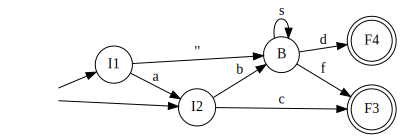

In [ ]:
dotObj_nfa(nfa1)

## 1.1: Convert the given NFA to a DFA by hand.

Use as many bullets as necessary to clearly show your work:

* Q = {I1, I2, B, F3, F4}
* $\Sigma$ = {$\varepsilon$, a, b, s, d, f, c}
* F = {F3, F4}

| state | $\varepsilon$ | a | b | c | d | f | s |
| --- | --- | --- | --- | --- | --- | --- | --- |
| I1 | B | I2 | | | | | |
| I2 | | | B | F3 | | | |
| B  | | | | | F4 | F3 | B |
| F3 | | | | | | | |
| F4 | | | | | | | |


* Before any transitions occur I1, I2, and B are all going to recieve a token thus a I1_I2_B state is present in the DFA
* We then can go through each symbol and follow the outgoing transitions from these three "initial states"
* Consider a 'a' 
* A token is moved to I2 and all other tokens disappear
* Thus a I2 state is needed in the DFA
* Consider a 'b' 
* A token is moved to B and all other tokens disappear
* Thus a B state is needed in the DFA
* Consider a 's' 
* A token is moved from and to B and all other tokens disappear
* Thus a B state is needed in the DFA but this was already known
* Consider a 'c' 
* A token is moved to F3 and all other tokens disappear
* Thus a F3 state is needed in the DFA
* Consider a 'd' 
* A token is moved to F4 and all other tokens disappear
* Thus a F4 state is needed in the DFA
* Consider a 'f' 
* A token is moved to F3 and all other tokens disappear
* Thus a F3 state is needed in the DFA but this was already known
* This accounts for all the transitions in the NFA

In [ ]:
# DFA of nfa1

dfa1 = md2mc('''DFA

I1_I2_B : a -> wasI2
I1_I2_B : b -> B
I1_I2_B : s -> B
I1_I2_B : c -> F3
I1_I2_B : d -> F4
I1_I2_B : f -> F3

wasI2 : b -> B
wasI2 : c -> F3

B : s -> B
B : f -> F3
B : d -> F4 

''')

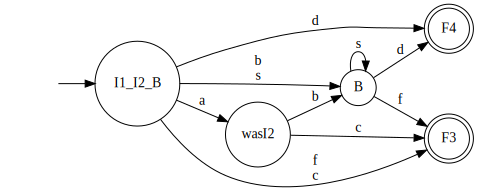

In [ ]:
dotObj_dfa(dfa1, FuseEdges=True)

## 1.2: Reverse nfa1 by hand and name the states in this manner:

1) Change F3 to I3

2) Change F4 to I4

3) Change I1 and I2 to F1 and F2

4) Now, reverse the transitions of nfa1, obtaining "rnfa1" below
 

In [ ]:
# There is no Jove function to reverse automatically - do it by hand!
rnfa1 = md2mc('''
NFA

B : '' -> F1
F2 : a  -> F1

I3 : c  -> F2
B : b  -> F2

B : s  -> B
I4 : d  -> B
I3 : f  -> B

''')

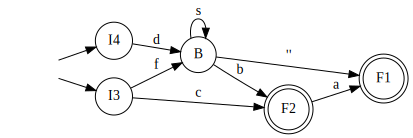

In [ ]:
dotObj_nfa(rnfa1)

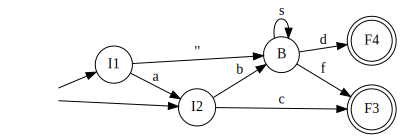

In [ ]:
dotObj_nfa(nfa1)

## 1.3: Inspect and conclude that rnfa1 is truly the reverse of nfa1
### List the first six strings in numeric order and check that they have been correctly reversed. State the string in the original machine and explain (by specifying a path as a sequence of states) that this string is present in the reversed machine also.

1. ac is present in nfa1 and ca is present in rnfa1

2. abd is present in nfa1 and dba is present in rnfa1

3. absd is present in nfa1 and dsba is present in rnfa1

4. abf is present in nfa1 and fba is present in rnfa1

5. absf is present in nfa1 and fsba is present in rnfa1

6. bsf is present in nfa1 and fsb is present in rnfa1

 
 

# Problem 2: Extraction of RE by Inspection and other things before it


## 2.1: Totalize dfa1 to obtain the totalized machine, then explain totalize_dfa in a few sentences below, by looking at the Delta before and After

In [ ]:
tdfa1 = totalize_dfa(dfa1)

### Your explanation of totalize_dfa:

* All symbols need to have a transition from each state

* Totalizing puts each missing transition to the black hole state

* Totalizing a DFA ensures there isn't any undefined behavior within the automata.



##  Compare the dfa with and without the black hole:

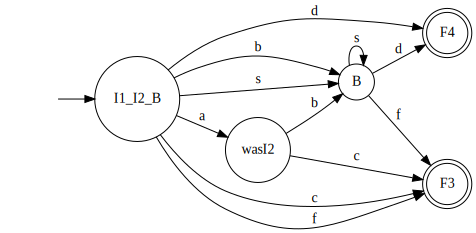

In [ ]:
dotObj_dfa(tdfa1)

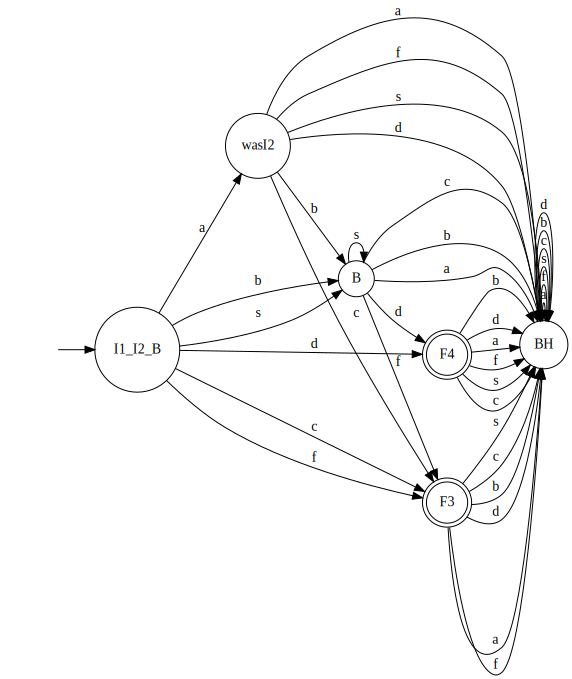

In [ ]:
dotObj_dfa_w_bh(tdfa1)

### Was it a good idea to not always show black-holes?

* In what circumstances might you still need to apply the _w_bh view option?
An open-ended answer - anything you may think up can be a valuable piece of feedback.

Answer:

* You might want to use the _w_bh option when you want to see the full behavior of a DFA without any missing transitions.
* Using the _w_bh option would also make it more obvious that there is a black hole in the graph.

## 2.2: Obtain an RE by looking at nfa1

* Follow all paths

* Summarize the paths in your head, using the Star operator suitably




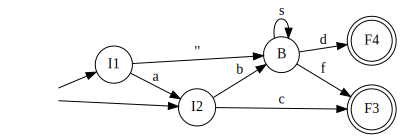

In [ ]:
dotObj_nfa(nfa1)

In [53]:
RE1_hand = "c + ac + abs*d + bs*d + abs*f + bs*f + s*d + s*f"

## 2.3: Reverse RE1 by hand to obtain Rev_RE1

Once you have an RE, you can "visually reverse it" for simple REs

In [54]:
Rev_RE1_hand = "c + ca + ds*ba + ds*b + fs*ba + fs*b + ds* + fs*"

## 2.4: Understand del_gnfa_states via help

In [ ]:
# help of del_gnfa_states run below
help(del_gnfa_states)

Help on function del_gnfa_states in module jove.Def_NFA2RE:

del_gnfa_states(Gin, DelList=[])
    Given a GNFA Gin with no unreachable states, 
    delete all states but f
    or Real_I and Real_F.
    If DelList is given, follow the state deletion
    order mentioned therein; else choose order internally.
    
    Return a triple (Gfinal, dotObj_List, final_re_str), where
      Gfinal       : the final GNFA
      dotObj_List  : a list of Dot objects recording the process of
                     deleting states and forming intermediate REs
      final_re_str : the final RE as a string (ready to be fed to  
                     re2nfa for converting back to an NFA)



### Document what you learned from the function help of del_gnfa_states and summarize below


* The function returns a triple (tuple with 3 elements).

* One of the elements in the tuple is the final GNFA.

* One of the elements is the updated dot objects after each deletion.

* The final_re_string is the regular expression which is ready to be converted to an NFA.

# Problem 3: Converting to GNFA and Attempting Two Elimination Orders

Work on rnfa1 to obtain Rev_RE1 and Rev_RE2 

## 3.1: Obtain grnfa1 below via a suitable command

In [ ]:
grnfa1 = mk_gnfa(rnfa1)

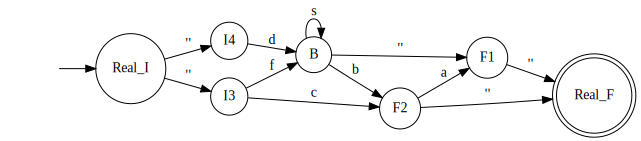

In [ ]:
dotObj_gnfa(grnfa1)

## 3.2: Apply the elimination order by supplying the second argument 
['B', 'F2', 'F1', 'I3', 'I4']

as you learned in the help

In [ ]:
(Gfinal, DO, Rev_RE1) = del_gnfa_states(grnfa1, ['B', 'F2', 'F1', 'I3', 'I4'])

**** Eliminating state B ****
**** Eliminating state F2 ****
**** Eliminating state F1 ****
**** Eliminating state I3 ****
**** Eliminating state I4 ****


In [ ]:
Rev_RE1

'((((((((d ((s)* b)) a) + (d (s)*)) + (d (s)*)) + (d ((s)* b))) + (d ((s)* b))) + ((((((((f ((s)* b)) + c) + c) a) + (f (s)*)) + (f (s)*)) + (((f ((s)* b)) + c) + c)) + (((f ((s)* b)) + c) + c))) + ((((((((f ((s)* b)) + c) + c) a) + (f (s)*)) + (f (s)*)) + (((f ((s)* b)) + c) + c)) + (((f ((s)* b)) + c) + c)))'

Generating LALR tables


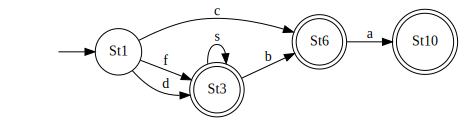

In [ ]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa(Rev_RE1))))

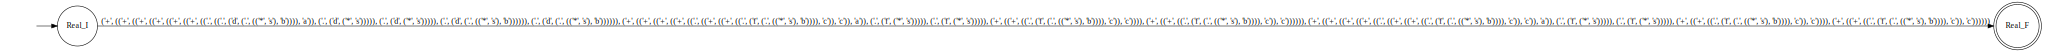

In [ ]:
dotObj_gnfa(Gfinal)

## Examine DO[0] through DO[Last_Legal_Item] (find out how long DO is)

DO[0] is the initial GNFA machine, DO[1] is the next one, and so on. You will see each step getting
rid of one state.

### Summarize your observation of the state elimination and which REs were introduced as a result. Use one bullet per question answered below.

* B

  I3 -> F2 [label="((f ((s)* b)) + c) "] <br />
  I3 -> F1 [label="(f (s)*) "] <br />
  I4 -> F2 [label="(d ((s)* b)) "] <br />
  I4 -> F1 [label="(d (s)*) "]

* F2

  I3 -> F1 [label="(((((f ((s)* b)) + c) + c) a) + (f (s)*)) "]<br />
  I3 -> Real_F [label="(((f ((s)* b)) + c) + c) "]<br />
  I4 -> F1 [label="(((d ((s)* b)) a) + (d (s)*)) "]<br />
  I4 -> Real_F [label="(d ((s)* b)) "]<br />
  I3 -> F1 [label="(f (s)*) "]<br />
  I4 -> F1 [label="(d (s)*) "]

* F1

  I3 -> Real_F [label="(((((((f ((s)* b)) + c) + c) a) + (f (s)*)) + (f (s)*)) + (((f ((s)* b)) + c) + c)) "]<br />
  I4 -> Real_F [label="(((((d ((s)* b)) a) + (d (s)*)) + (d (s)*)) + (d ((s)* b))) "]<br />
  I3 -> Real_F [label="(((f ((s)* b)) + c) + c) "]<br />
  I4 -> Real_F [label="(d ((s)* b)) "]<br />

* I3

  Real_I -> Real_F [label="((((((((f ((s)* b)) + c) + c) a) + (f (s)*)) + (f (s)*)) + (((f ((s)* b)) + c) + c)) + (((f ((s)* b)) + c) + c)) "]<br />
  I4 -> Real_F [label="(((((d ((s)* b)) a) + (d (s)*)) + (d (s)*)) + (d ((s)* b))) "]<br />
  I4 -> Real_F [label="(d ((s)* b)) "]<br />

* I4

  Real_I -> Real_F [label="(((((((d ((s)* b)) a) + (d (s)*)) + (d (s)*)) + (d ((s)* b))) + (d ((s)* b))) + ((((((((f ((s)* b)) + c) + c) a) + (f (s)*)) + (f (s)*)) + (((f ((s)* b)) + c) + c)) + (((f ((s)* b)) + c) + c))) "]<br />
  Real_I -> Real_F [label="((((((((f ((s)* b)) + c) + c) a) + (f (s)*)) + (f (s)*)) + (((f ((s)* b)) + c) + c)) + (((f ((s)* b)) + c) + c)) "]


In [ ]:
[*map(print,DO)]

// GO_St40
digraph {
	graph [rankdir=LR]
	EMPTY [label="" shape=plaintext]
	I4 [label=I4 peripheries=1 shape=circle]
	Real_I [label=Real_I peripheries=1 shape=circle]
	F1 [label=F1 peripheries=1 shape=circle]
	I3 [label=I3 peripheries=1 shape=circle]
	F2 [label=F2 peripheries=1 shape=circle]
	B [label=B peripheries=1 shape=circle]
	Real_F [label=Real_F peripheries=2 shape=circle]
	EMPTY -> Real_I
	B -> F1 [label="'' "]
	F2 -> F1 [label="a "]
	I3 -> F2 [label="c "]
	B -> F2 [label="b "]
	B -> B [label="s "]
	I4 -> B [label="d "]
	I3 -> B [label="f "]
	Real_I -> I4 [label="'' "]
	Real_I -> I3 [label="'' "]
	F2 -> Real_F [label="'' "]
	F1 -> Real_F [label="'' "]
}
// GO_St41
digraph {
	graph [rankdir=LR]
	EMPTY [label="" shape=plaintext]
	I4 [label=I4 peripheries=1 shape=circle]
	Real_I [label=Real_I peripheries=1 shape=circle]
	F1 [label=F1 peripheries=1 shape=circle]
	I3 [label=I3 peripheries=1 shape=circle]
	F2 [label=F2 peripheries=1 shape=circle]
	Real_F [label=Real_F peripheries=2 s

[None, None, None, None, None, None]

## 3.3: Apply the elimination order by supplying the second argument 
 ['I3', 'I4', 'F1', 'B', 'F2' ]

as you learned in the help

In [ ]:
(Gfinal2, DO2, Rev_RE2) = del_gnfa_states(grnfa1, ['I3', 'I4', 'F1', 'B', 'F2' ])

**** Eliminating state I3 ****
**** Eliminating state I4 ****
**** Eliminating state F1 ****
**** Eliminating state B ****
**** Eliminating state F2 ****


In [ ]:
Rev_RE2

'((((((((d + f) + f) ((s)* b)) + c) + c) ((a + "") + "")) + (((d + f) + f) (s)*)) + (((d + f) + f) (s)*))'

Generating LALR tables


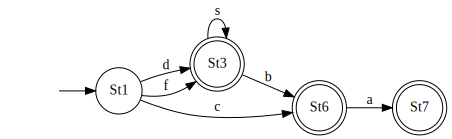

In [ ]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa(Rev_RE2))))

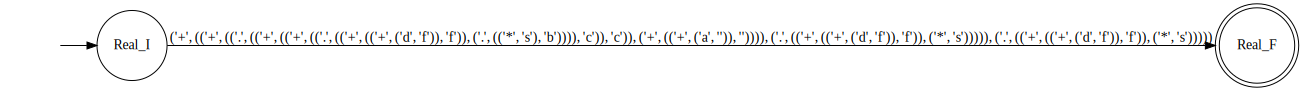

In [ ]:
dotObj_gnfa(Gfinal2)

## Examine DO[0] through DO[Last_Legal_Item] (find out how long DO is)

### Summarize your observation of the state elimination and which REs were introduced as a result

* I3



* I4



* F1



* B



* F2




In [ ]:
[*map(print,DO2)]

// GO_St40
digraph {
	graph [rankdir=LR]
	EMPTY [label="" shape=plaintext]
	I4 [label=I4 peripheries=1 shape=circle]
	Real_I [label=Real_I peripheries=1 shape=circle]
	F1 [label=F1 peripheries=1 shape=circle]
	I3 [label=I3 peripheries=1 shape=circle]
	F2 [label=F2 peripheries=1 shape=circle]
	B [label=B peripheries=1 shape=circle]
	Real_F [label=Real_F peripheries=2 shape=circle]
	EMPTY -> Real_I
	B -> F1 [label="'' "]
	F2 -> F1 [label="a "]
	I3 -> F2 [label="c "]
	B -> F2 [label="b "]
	B -> B [label="s "]
	I4 -> B [label="d "]
	I3 -> B [label="f "]
	Real_I -> I4 [label="'' "]
	Real_I -> I3 [label="'' "]
	F2 -> Real_F [label="'' "]
	F1 -> Real_F [label="'' "]
}
// GO_St41
digraph {
	graph [rankdir=LR]
	EMPTY [label="" shape=plaintext]
	I4 [label=I4 peripheries=1 shape=circle]
	Real_I [label=Real_I peripheries=1 shape=circle]
	F1 [label=F1 peripheries=1 shape=circle]
	F2 [label=F2 peripheries=1 shape=circle]
	B [label=B peripheries=1 shape=circle]
	Real_F [label=Real_F peripheries=2 sha

[None, None, None, None, None, None]

## 3.4: Check for isomorphism as requested between Rev_RE1 and Rev_RE2

Apply a Jove call that is compact (and will be given in class) that checks that Rev_RE1 and Rev_RE2 are equivalent. It has to involve iso_dfa and min_dfa and other calls.

In [57]:
iso_dfa(min_dfa(nfa2dfa(re2nfa(Rev_RE1))), min_dfa(nfa2dfa(re2nfa(Rev_RE2))))

Generating LALR tables
Generating LALR tables


True

In [55]:
# Just look at it again for comparison

Rev_RE1_hand

'c + ca + ds*ba + ds*b + fs*ba + fs*b + ds* + fs*'

## 3.5: Check for isomorphism as requested between Rev_RE1 and Rev_RE1_hand

Same methods as above.

Generating LALR tables
Generating LALR tables
Generating LALR tables


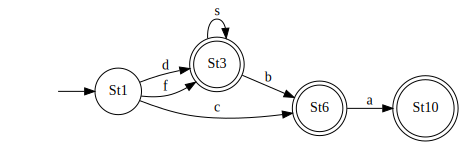

In [56]:
iso_dfa(min_dfa(nfa2dfa(re2nfa(Rev_RE1))), min_dfa(nfa2dfa(re2nfa(Rev_RE1_hand))))
dotObj_dfa(min_dfa(nfa2dfa(re2nfa(Rev_RE1_hand))))

# Problem 4: Chasing down the RE2NFA components

Find out where the s* components are and explain the set of all strings that precede s* in Rev_RE2 and the NFA of Rev_RE2

Find out where the ending "a" is, and find out the set of all the symbols that precede a

Let's first look at the NFA and then see where the RE "parts" are in it.

Generating LALR tables


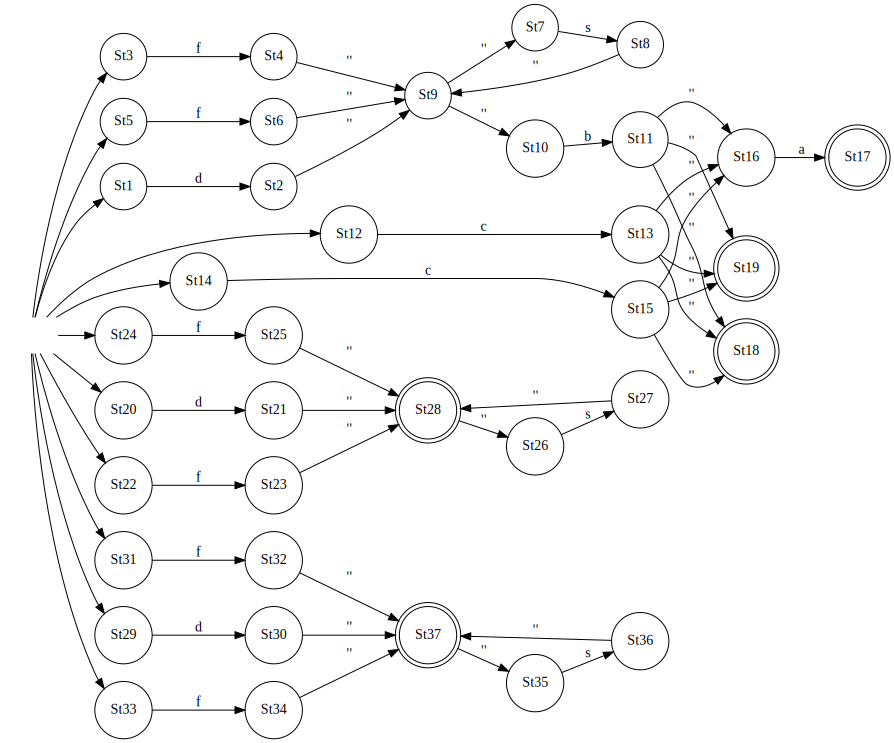

In [58]:
dotObj_nfa(re2nfa(Rev_RE2))


This is an exercise in explaining how Rev_RE2 got translated to an NFA. You are to pick these cases and find an example of each, and explain below. What you pick does not matter.

* Find a case where a Star is used, and explain the construction, pointing to the states involved. Use up to 6 bullets below. More or less based on how you explain (clarity not length emphasized).
  - **St9 -('')-> St7 -(s)-> St8 -('')-> St9**
  - **St28 -('')-> St26 -(s)-> St27 -('')-> St28**
  - **St37 -('')-> St35 -(s)-> St36 -('')-> St37**
  - All of these have a "base" state, an $\varepsilon$ transition, a 's' transition, and another $\varepsilon$ transition back to the base state.

* Find a case where the Star follows something (I.e. a concatenation of the form "X" followed by "Star" is used). Show how that concatenation construction is accomplished in the same manner (up to 6 bullets roughly) as above. More or less based on how you explain.
  - St3 -(f)-> St4 -('')-> **St9 -('')-> St7 -(s)-> St8 -('')-> St9**
  - St5 -(f)-> St6 -('')-> **St9 -('')-> St7 -(s)-> St8 -('')-> St9**
  - St1 -(d)-> St2 -('')-> **St9 -('')-> St7 -(s)-> St8 -('')-> St9**
  - These just have states leading to the base state (mentioned in the earlier answer).
  
* Find a case where something follows Star (I.e. a concatenation of the form "Star" followed by "X"). Explain how the concatenation is accomplished.
  - Anything that happens after St10
  - An $\varepsilon$ transition takes place after the base state that leads to other transitions than the "s" loop.

## Repeat finding out the aforesaid paths in your own Rev_RE1_hand

Generating LALR tables


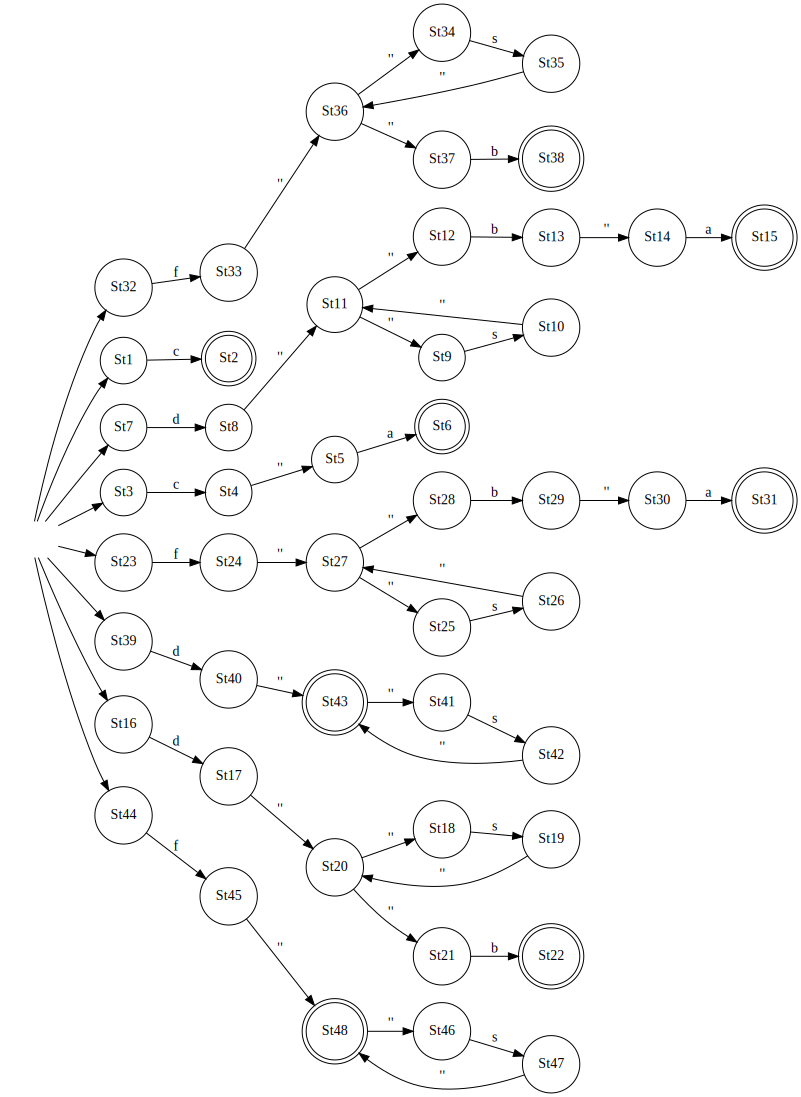

In [59]:
dotObj_nfa(re2nfa(Rev_RE1_hand))


This is an exercise in explaining how Rev_RE1_hand got translated to an NFA. You are to pick these cases and find an example of each, and explain below. What you pick does not matter.

* Find a case where a Star is used, and explain the construction, pointing to the states involved. Use up to 6 bullets below. More or less based on how you explain (clarity not length emphasized).
  - **St48 -('')-> St46 -(s)-> St47 -('')-> St48**
  - **St20 -('')-> St18 -(s)-> St19 -('')-> St20**
  - **St43 -('')-> St41 -(s)-> St42 -('')-> St43**
  - All of these have a "base" state, an $\varepsilon$ transition, a 's' transition, and another $\varepsilon$ transition back to the base state.

* Find a case where the Star follows something (I.e. a concatenation of the form "X" followed by "Star" is used). If such a case does not arise in your RE, skip this part. Show how that concatenation construction is accomplished in the same manner (up to 6 bullets roughly) as above. More or less based on how you explain. 
  - St44 -(f)-> St45 -('')-> **St48 -('')-> St46 -(s)-> St47 -('')-> St48**
  - St16 -(d)-> St17 -('')-> **St20 -('')-> St18 -(s)-> St19 -('')-> St20**
  - St39 -(d)-> St40 -('')-> **St43 -('')-> St41 -(s)-> St42 -('')-> St43**
  - These just have states leading to the base state (mentioned in the earlier answer).
  
* Find a case where something follows Star (I.e. a concatenation of the form "Star" followed by "X"). If such a case does not arise in your RE, skip this part. Explain how the concatenation is accomplished.
  - 36 -('')-> 37
  - 11 -('')-> 12
  - 27 -('')-> 28
  - An $\varepsilon$ transition takes place after the base state that leads to other transitions than the "s" loop.

# END
